In [1]:
import scipy

from nilearn.datasets import fetch_neurovault_ids
import warnings

import numpy as np
from scipy import stats
from sklearn.decomposition import FastICA

from nilearn import datasets
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting

from nilearn.datasets import fetch_neurovault
from nilearn.datasets.neurovault import basic_collection_terms, NotNull
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nv_data = fetch_neurovault_ids(collection_ids=(1952,))

images = nv_data['images']
images_meta = nv_data['images_meta']
collections = nv_data['collections_meta']

Reading local neurovault data.
Already fetched 1 image
Already fetched 2 images
Already fetched 3 images
Already fetched 4 images
Already fetched 5 images
Already fetched 6 images
Already fetched 7 images
Already fetched 8 images
Already fetched 9 images
Already fetched 10 images
Already fetched 11 images
Already fetched 12 images
Already fetched 13 images
Already fetched 14 images
Already fetched 15 images
Already fetched 16 images
Already fetched 17 images
Already fetched 18 images
Already fetched 19 images
Already fetched 20 images
Already fetched 21 images
Already fetched 22 images
Already fetched 23 images
Already fetched 24 images
Already fetched 25 images
Already fetched 26 images
Already fetched 27 images
Already fetched 28 images
Already fetched 29 images
Already fetched 30 images
Already fetched 31 images
Already fetched 32 images
Already fetched 33 images
Already fetched 34 images
Already fetched 35 images
Already fetched 36 images
Already fetched 37 images
Already fetched 3

Already fetched 413 images
Already fetched 414 images
Already fetched 415 images
Already fetched 416 images
Already fetched 417 images
Already fetched 418 images
Already fetched 419 images
Already fetched 420 images
Already fetched 421 images
Already fetched 422 images
Already fetched 423 images
Already fetched 424 images
Already fetched 425 images
Already fetched 426 images
Already fetched 427 images
Already fetched 428 images
Already fetched 429 images
Already fetched 430 images
Already fetched 431 images
Already fetched 432 images
Already fetched 433 images
Already fetched 434 images
Already fetched 435 images
Already fetched 436 images
Already fetched 437 images
Already fetched 438 images
Already fetched 439 images
Already fetched 440 images
Already fetched 441 images
Already fetched 442 images
Already fetched 443 images
Already fetched 444 images
Already fetched 445 images
Already fetched 446 images
Already fetched 447 images
Already fetched 448 images
Already fetched 449 images
A

Already fetched 878 images
Already fetched 879 images
Already fetched 880 images
Already fetched 881 images
Already fetched 882 images
Already fetched 883 images
Already fetched 884 images
Already fetched 885 images
Already fetched 886 images
Already fetched 887 images
Already fetched 888 images
Already fetched 889 images
Already fetched 890 images
Already fetched 891 images
Already fetched 892 images
Already fetched 893 images
Already fetched 894 images
Already fetched 895 images
Already fetched 896 images
Already fetched 897 images
Already fetched 898 images
Already fetched 899 images
Already fetched 900 images
Already fetched 901 images
Already fetched 902 images
Already fetched 903 images
Already fetched 904 images
Already fetched 905 images
Already fetched 906 images
Already fetched 907 images
Already fetched 908 images
Already fetched 909 images
Already fetched 910 images
Already fetched 911 images
Already fetched 912 images
Already fetched 913 images
Already fetched 914 images
A

Already fetched 1376 images
Already fetched 1377 images
Already fetched 1378 images
Already fetched 1379 images
Already fetched 1380 images
Already fetched 1381 images
Already fetched 1382 images
Already fetched 1383 images
Already fetched 1384 images
Already fetched 1385 images
Already fetched 1386 images
Already fetched 1387 images
Already fetched 1388 images
Already fetched 1389 images
Already fetched 1390 images
Already fetched 1391 images
Already fetched 1392 images
Already fetched 1393 images
Already fetched 1394 images
Already fetched 1395 images
Already fetched 1396 images
Already fetched 1397 images
Already fetched 1398 images
Already fetched 1399 images
Already fetched 1400 images
Already fetched 1401 images
Already fetched 1402 images
Already fetched 1403 images
Already fetched 1404 images
Already fetched 1405 images
Already fetched 1406 images
Already fetched 1407 images
Already fetched 1408 images
Already fetched 1409 images
Already fetched 1410 images
Already fetched 1411

Already fetched 1867 images
Already fetched 1868 images
Already fetched 1869 images
Already fetched 1870 images
Already fetched 1871 images
Already fetched 1872 images
Already fetched 1873 images
Already fetched 1874 images
Already fetched 1875 images
Already fetched 1876 images
Already fetched 1877 images
Already fetched 1878 images
Already fetched 1879 images
Already fetched 1880 images
Already fetched 1881 images
Already fetched 1882 images
Already fetched 1883 images
Already fetched 1884 images
Already fetched 1885 images
Already fetched 1886 images
Already fetched 1887 images
Already fetched 1888 images
Already fetched 1889 images
Already fetched 1890 images
Already fetched 1891 images
Already fetched 1892 images
Already fetched 1893 images
Already fetched 1894 images
Already fetched 1895 images
Already fetched 1896 images
Already fetched 1897 images
Already fetched 1898 images
Already fetched 1899 images
Already fetched 1900 images
Already fetched 1901 images
Already fetched 1902

Already fetched 2358 images
Already fetched 2359 images
Already fetched 2360 images
Already fetched 2361 images
Already fetched 2362 images
Already fetched 2363 images
Already fetched 2364 images
Already fetched 2365 images
Already fetched 2366 images
Already fetched 2367 images
Already fetched 2368 images
Already fetched 2369 images
Already fetched 2370 images
Already fetched 2371 images
Already fetched 2372 images
Already fetched 2373 images
Already fetched 2374 images
Already fetched 2375 images
Already fetched 2376 images
Already fetched 2377 images
Already fetched 2378 images
Already fetched 2379 images
Already fetched 2380 images
Already fetched 2381 images
Already fetched 2382 images
Already fetched 2383 images
Already fetched 2384 images
Already fetched 2385 images
Already fetched 2386 images
Already fetched 2387 images
Already fetched 2388 images
Already fetched 2389 images
Already fetched 2390 images
Already fetched 2391 images
Already fetched 2392 images
Already fetched 2393

Already fetched 2844 images
Already fetched 2845 images
Already fetched 2846 images
Already fetched 2847 images
Already fetched 2848 images
Already fetched 2849 images
Already fetched 2850 images
Already fetched 2851 images
Already fetched 2852 images
Already fetched 2853 images
Already fetched 2854 images
Already fetched 2855 images
Already fetched 2856 images
Already fetched 2857 images
Already fetched 2858 images
Already fetched 2859 images
Already fetched 2860 images
Already fetched 2861 images
Already fetched 2862 images
Already fetched 2863 images
Already fetched 2864 images
Already fetched 2865 images
Already fetched 2866 images
Already fetched 2867 images
Already fetched 2868 images
Already fetched 2869 images
Already fetched 2870 images
Already fetched 2871 images
Already fetched 2872 images
Already fetched 2873 images
Already fetched 2874 images
Already fetched 2875 images
Already fetched 2876 images
Already fetched 2877 images
Already fetched 2878 images
Already fetched 2879

Already fetched 3335 images
Already fetched 3336 images
Already fetched 3337 images
Already fetched 3338 images
Already fetched 3339 images
Already fetched 3340 images
Already fetched 3341 images
Already fetched 3342 images
Already fetched 3343 images
Already fetched 3344 images
Already fetched 3345 images
Already fetched 3346 images
Already fetched 3347 images
Already fetched 3348 images
Already fetched 3349 images
Already fetched 3350 images
Already fetched 3351 images
Already fetched 3352 images
Already fetched 3353 images
Already fetched 3354 images
Already fetched 3355 images
Already fetched 3356 images
Already fetched 3357 images
Already fetched 3358 images
Already fetched 3359 images
Already fetched 3360 images
Already fetched 3361 images
Already fetched 3362 images
Already fetched 3363 images
Already fetched 3364 images
Already fetched 3365 images
Already fetched 3366 images
Already fetched 3367 images
Already fetched 3368 images
Already fetched 3369 images
Already fetched 3370

Already fetched 3823 images
Already fetched 3824 images
Already fetched 3825 images
Already fetched 3826 images
Already fetched 3827 images
Already fetched 3828 images
Already fetched 3829 images
Already fetched 3830 images
Already fetched 3831 images
Already fetched 3832 images
Already fetched 3833 images
Already fetched 3834 images
Already fetched 3835 images
Already fetched 3836 images
Already fetched 3837 images
Already fetched 3838 images
Already fetched 3839 images
Already fetched 3840 images
Already fetched 3841 images
Already fetched 3842 images
Already fetched 3843 images
Already fetched 3844 images
Already fetched 3845 images
Already fetched 3846 images
Already fetched 3847 images
Already fetched 3848 images
Already fetched 3849 images
Already fetched 3850 images
Already fetched 3851 images
Already fetched 3852 images
Already fetched 3853 images
Already fetched 3854 images
Already fetched 3855 images
Already fetched 3856 images
Already fetched 3857 images
Already fetched 3858

Already fetched 4297 images
Already fetched 4298 images
Already fetched 4299 images
Already fetched 4300 images
Already fetched 4301 images
Already fetched 4302 images
Already fetched 4303 images
Already fetched 4304 images
Already fetched 4305 images
Already fetched 4306 images
Already fetched 4307 images
Already fetched 4308 images
Already fetched 4309 images
Already fetched 4310 images
Already fetched 4311 images
Already fetched 4312 images
Already fetched 4313 images
Already fetched 4314 images
Already fetched 4315 images
Already fetched 4316 images
Already fetched 4317 images
Already fetched 4318 images
Already fetched 4319 images
Already fetched 4320 images
Already fetched 4321 images
Already fetched 4322 images
Already fetched 4323 images
Already fetched 4324 images
Already fetched 4325 images
Already fetched 4326 images
Already fetched 4327 images
Already fetched 4328 images
Already fetched 4329 images
Already fetched 4330 images
Already fetched 4331 images
Already fetched 4332

Already fetched 4794 images
Already fetched 4795 images
Already fetched 4796 images
Already fetched 4797 images
Already fetched 4798 images
Already fetched 4799 images
Already fetched 4800 images
Already fetched 4801 images
Already fetched 4802 images
Already fetched 4803 images
Already fetched 4804 images
Already fetched 4805 images
Already fetched 4806 images
Already fetched 4807 images
Already fetched 4808 images
Already fetched 4809 images
Already fetched 4810 images
Already fetched 4811 images
Already fetched 4812 images
Already fetched 4813 images
Already fetched 4814 images
Already fetched 4815 images
Already fetched 4816 images
Already fetched 4817 images
Already fetched 4818 images
Already fetched 4819 images
Already fetched 4820 images
Already fetched 4821 images
Already fetched 4822 images
Already fetched 4823 images
Already fetched 4824 images
Already fetched 4825 images
Already fetched 4826 images
Already fetched 4827 images
Already fetched 4828 images
Already fetched 4829

Already fetched 5264 images
Already fetched 5265 images
Already fetched 5266 images
Already fetched 5267 images
Already fetched 5268 images
Already fetched 5269 images
Already fetched 5270 images
Already fetched 5271 images
Already fetched 5272 images
Already fetched 5273 images
Already fetched 5274 images
Already fetched 5275 images
Already fetched 5276 images
Already fetched 5277 images
Already fetched 5278 images
Already fetched 5279 images
Already fetched 5280 images
Already fetched 5281 images
Already fetched 5282 images
Already fetched 5283 images
Already fetched 5284 images
Already fetched 5285 images
Already fetched 5286 images
Already fetched 5287 images
Already fetched 5288 images
Already fetched 5289 images
Already fetched 5290 images
Already fetched 5291 images
Already fetched 5292 images
Already fetched 5293 images
Already fetched 5294 images
Already fetched 5295 images
Already fetched 5296 images
Already fetched 5297 images
Already fetched 5298 images
Already fetched 5299

Already fetched 5746 images
Already fetched 5747 images
Already fetched 5748 images
Already fetched 5749 images
Already fetched 5750 images
Already fetched 5751 images
Already fetched 5752 images
Already fetched 5753 images
Already fetched 5754 images
Already fetched 5755 images
Already fetched 5756 images
Already fetched 5757 images
Already fetched 5758 images
Already fetched 5759 images
Already fetched 5760 images
Already fetched 5761 images
Already fetched 5762 images
Already fetched 5763 images
Already fetched 5764 images
Already fetched 5765 images
Already fetched 5766 images
Already fetched 5767 images
Already fetched 5768 images
Already fetched 5769 images
Already fetched 5770 images
Already fetched 5771 images
Already fetched 5772 images
Already fetched 5773 images
Already fetched 5774 images
Already fetched 5775 images
Already fetched 5776 images
Already fetched 5777 images
Already fetched 5778 images
Already fetched 5779 images
Already fetched 5780 images
Already fetched 5781

Already fetched 6195 images
Already fetched 6196 images
Already fetched 6197 images
Already fetched 6198 images
Already fetched 6199 images
Already fetched 6200 images
Already fetched 6201 images
Already fetched 6202 images
Already fetched 6203 images
Already fetched 6204 images
Already fetched 6205 images
Already fetched 6206 images
Already fetched 6207 images
Already fetched 6208 images
Already fetched 6209 images
Already fetched 6210 images
Already fetched 6211 images
Already fetched 6212 images
Already fetched 6213 images
Already fetched 6214 images
Already fetched 6215 images
Already fetched 6216 images
Already fetched 6217 images
Already fetched 6218 images
Already fetched 6219 images
Already fetched 6220 images
Already fetched 6221 images
Already fetched 6222 images
Already fetched 6223 images
Already fetched 6224 images
Already fetched 6225 images
Already fetched 6226 images
Already fetched 6227 images
Already fetched 6228 images
Already fetched 6229 images
Already fetched 6230

In [3]:
print("\nReshaping and masking images.\n")
from nilearn.masking import compute_background_mask

mask = compute_background_mask(images)
masker = NiftiMasker(mask_img=mask).fit()
X = masker.transform(images)


Reshaping and masking images.



/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


# Multicore TSNE run

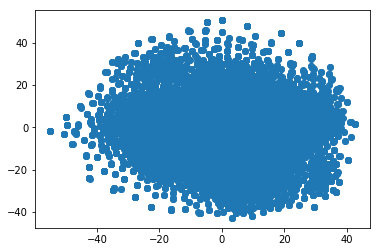

In [4]:
from MulticoreTSNE import MulticoreTSNE as TSNE

embeddings = TSNE(n_jobs=-1).fit_transform(X)

plt.scatter(embeddings[:,0], embeddings[:,1])

# MDS Run

In [5]:
from sklearn.manifold import MDS

embedding = MDS(n_jobs=-1, random_state=42).fit_transform(X)

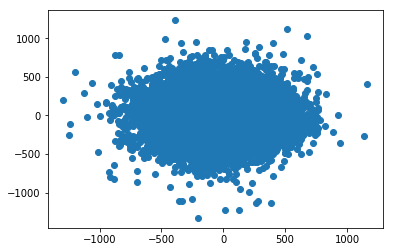

In [6]:
plt.scatter(embedding[:,0], embedding[:,1])

# UMAP Run

In [7]:
import umap

embedding0 = umap.UMAP().fit_transform(X)

/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


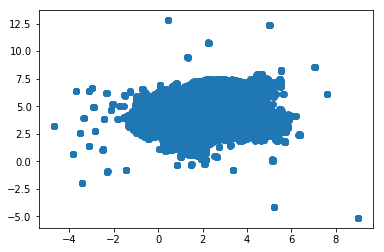

In [8]:
plt.scatter(embedding0[:,0], embedding0[:,1])

# LOF run for t-SNE

In [9]:
from sklearn.neighbors import LocalOutlierFactor


clf = LocalOutlierFactor(n_neighbors=20, n_jobs=-1)
y_pred_tsne = clf.fit_predict(embeddings)
y_pred_outliers_tsne = y_pred_tsne[200:]

/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


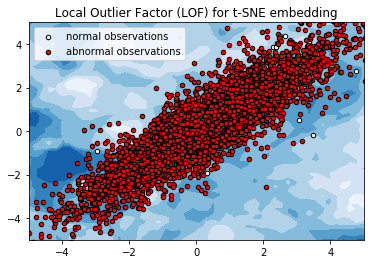

In [11]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF) for t-SNE embedding")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

# LOF run for MDS

In [12]:
from sklearn.neighbors import LocalOutlierFactor


clf_1 = LocalOutlierFactor(n_neighbors=20, n_jobs=-1)
y_pred_mds = clf_1.fit_predict(embedding)
y_pred_outliers_mds = y_pred_mds[200:]

/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


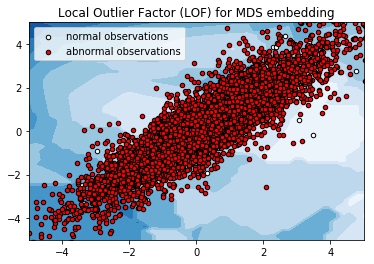

In [13]:
xx1, yy1 = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z1 = clf_1._decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF) for MDS embedding")
plt.contourf(xx1, yy1, Z1, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

# LOF Run for UMAP

In [14]:
from sklearn.neighbors import LocalOutlierFactor


clf_2 = LocalOutlierFactor(n_neighbors=20, n_jobs=-1)
y_pred_umap = clf_2.fit_predict(embedding0)
y_pred_outliers_umap = y_pred_umap[200:]

/home/ssouravsingh12/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


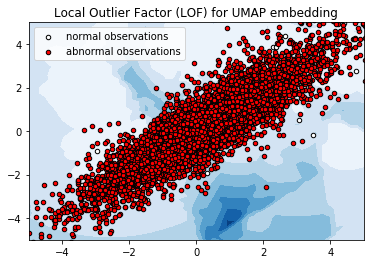

In [15]:
xx2, yy2 = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z2 = clf_2._decision_function(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF) for UMAP embedding")
plt.contourf(xx2, yy2, Z2, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()